
!pip install tellurium


In [2]:
import tellurium as te
import matplotlib.pyplot as plt


In [4]:

antimony_model_C_BL = """
// Created by libAntimony v2.15.0
model *inhalation_C_art_ven()

  // Compartments and Species:
  compartment Air, Arterial, Venous, RestofBody, Lung;
  substanceOnly species Aair in Air, Aart in Arterial, Aven in Venous, Arest in RestofBody, Alung in Lung, Abloodlung in Bloodlung;

  // Assignment Rules:
  Vblood := BW*sc_Vblood;
  Vrest := BW*sc_Vrest;
  Vbloodlung := BW*sc_Vbloodlung;
  Vlung := BW*sc_Vlung;
  Vart := Vblood/3;
  Vven := Vblood- Vart;

  // Reactions:
  _J0: Aair -> Abloodlung; Falv*(Aair/Vair)*Fabs;
  _J1: Abloodlung -> Aart; CO*(Abloodlung/Vbloodlung)/k_bloodlung_blood;
  _J2: Aven -> Abloodlung; CO*(Aven/Vven);
  _J3: Aart -> Arest; Qrest*(Aart/Vart); 
  _J4: Arest -> Aven ; Qrest*(Arest/Vrest)/k_rest_blood;
  _J5: Aart -> Alung; Qlung*(Aart/Vart); 
  _J6: Alung -> Aven ; Qlung*(Alung/Vlung)/k_lung_blood;
  _J7: Aven -> Aart; CO*(Aven/Vven);
  _J8: Abloodlung -> Aair; Falv*(Abloodlung/Vbloodlung)/PCAir;

// Initial values
  Aair = 0; 
  Aair has MicroGM_per_L;
  Arest = 0;
  Arest has MicroGM_per_L;
  Alung = 0;
  Alung has MicroGM_per_L;
  Aart = 0;
  Aart has MicroGM_per_L;
  Aven = 0;
  Aven has MicroGM_per_L;

  // Compartment initializations:
  Vair = 1;
  Air has L;
  Arterial has L;
  Venous has L;
  RestofBody has L;
  Lung has L;
  
  // Variable initializations:
#------------------------
# Parameters
#------------------------
#------------------------
# Body size & base volumes
#------------------------

  BW = 70;
  BW has KiloGM;

  sc_Vblood = 0.074; // blood volume as a fraction of body weight #Quindroit2019
  sc_Vblood has L_PER_KiloGM;

  sc_Vlung = 0.0068; // lung volume as a fraction of body weight #Quindroit2019
  sc_Vlung has L_PER_KiloGM;

  sc_Vbloodlung = 0.0067; // lung volume as a fraction of body weight (Guyton A, Hall J (2011). Medical Physiology. Saunders/Elsevier. p. 478. ISBN 978-1-4160-4574-8.)
  sc_Vbloodlung has L_PER_KiloGM;

  sc_Vrest = 0.96-sc_Vblood-sc_Vlung-sc_Vbloodlung; // rest of body volume as a fraction of body weight
  sc_Vrest has L_PER_KiloGM;

#------------------------
# Plasma Flows
#------------------------
  CO = 12.5*BW^0.75;  # L/h (cardiac output)
  CO has L_PER_HR;

  sc_Qlung = 0.026; #Quindroit2019

  Qlung = CO * sc_Qlung ;

  Qrest = CO-Qlung; 
 

   Falv = 210;
   Falv has L_PER_HR;

// Chemicals
#------------------------
# Chemicals
#------------------------

  Fabs = 0.3; 

  k_rest_blood = 0.5;
  k_rest_blood has UNITLESS;

  k_lung_blood = 0.5;
  k_lung_blood has UNITLESS;

  k_bloodlung_blood = 0.5;
  k_bloodlung_blood has UNITLESS;

  PCAir = 2000;
  PCAir has UNITLESS;

  // Other declarations:
  var Arterial, Venous, RestofBody, CO;
  const Air, BW, sc_Vblood, sc_Vrest, sc_Vlung, sc_Vbloodlung, sc_Qlung, k_rest_blood, k_lung_blood, k_bloodlung_blood, PCAir;
  const Falv, Fabs;

  // Unit definitions:
  unit MicroGM = 1e-6 gram;
  unit HR = 3600 second;
  unit L = litre;
  unit KiloGM = 1e3 gram;
  unit L_PER_KiloGM = litre / 1e3 gram;
  unit L_PER_HR_PER_KiloGM0P75 = litre / (3600 second * (1e3 gram)^-0);
  unit UNITLESS = dimensionless;
  unit L_PER_HR = litre / 3600 second;
  unit volume = L;
  unit substance = MicroGM;
  unit extent = MicroGM;
  unit time_unit = HR;
  unit MicroGM_per_L = 1e-6 gram / litre;


end


"""

# Charger le modèle
r = te.loada(antimony_model_C_BL)

# Exporter en SBML
sbml_str = r.getSBML()

# Sauvegarder dans un fichier
with open("inhalation_blood_C_BL.xml", "w") as f:
    f.write(sbml_str)

print("✅ Fichier SBML généré : inhalation_blood_C_BL.xml")

✅ Fichier SBML généré : inhalation_blood_C_BL.xml


In [8]:
r.getGlobalParameterIds()

['BW',
 'sc_Vblood',
 'sc_Vrest',
 'sc_Vbloodlung',
 'sc_Vlung',
 'Falv',
 'Vair',
 'Fabs',
 'CO',
 'k_bloodlung_blood',
 'Qrest',
 'k_rest_blood',
 'Qlung',
 'k_lung_blood',
 'PCAir',
 'sc_Qlung',
 'Vblood',
 'Vrest',
 'Vbloodlung',
 'Vlung',
 'Vart',
 'Vven']

In [10]:
print(f"Aair={r.Aair}, Art={r.Aart}, Aven={r.Aven}, Arest={r.Arest}")
print(f"Vrest={getattr(r, 'Vrest', 'Non défini')}")
print(f"Vlung={getattr(r, 'Vlung', 'Non défini')}")
print(f"Air={getattr(r, 'Air', 'Non défini')}, Art={getattr(r, 'Art', 'Non défini')}, Ven={getattr(r, 'Ven', 'Non défini')}")
print(f"Fabs={r.Fabs}, PCAir={r.PCAir}, Falv={r.Falv}, BW={r.BW}")

print(hasattr(r, 'Vrest'))


Aair=0.0, Art=0.0, Aven=0.0, Arest=0.0
Vrest=61.074999999999996
Vlung=0.476
Air=1.0, Art=Non défini, Ven=Non défini
Fabs=0.3, PCAir=2000.0, Falv=210.0, BW=70.0
True


In [12]:
# Update for chemical parameters
r.Fabs = 0.3
r.PCAir = 2000
# Change the initial quantity in air (here 4.97e-05 µg) / single exposure
r.Aair = 4.97e-05
#r.Falv = 90 #1y-old
#r.BW = 12 #1y-old
simulation = r.simulate(0, 7, 300)


In [14]:
import pandas as pd
df = pd.DataFrame(simulation, columns=r.timeCourseSelections)
df.head()  

,time,[Aair],[Aart],[Aven],[Arest],[Alung],[Abloodlung]
0,0.000000,4.970000e-05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.023411,1.137432e-05,0.000007,0.000001,0.000029,6.057406e-07,6.688864e-07
2,0.046823,2.603486e-06,0.000004,0.000002,0.000040,6.308792e-07,2.844961e-07
3,0.070234,5.962781e-07,0.000003,0.000002,0.000043,5.163996e-07,1.969777e-07
4,0.093645,1.369262e-07,0.000003,0.000002,0.000044,4.337730e-07,1.764073e-07


In [18]:
r.timeCourseSelections

#import pandas as pd

#df = pd.DataFrame(simulation, columns=r.timeCourseSelections)
#df.head()  

# time column is equal to 0

['time', '[Aair]', '[Aart]', '[Aven]', '[Arest]', '[Alung]', '[Abloodlung]']

In [38]:
# Mass balance (not sure what are the 1 to 3 in the result df
# Mass balance (Amounts)
air_mass = simulation[:, 1] * r.Aair
art_mass = simulation[:, 2] * r.Aart
ven_mass = simulation[:, 3] * r.Aven
rest_mass = simulation[:, 4] * r.Arest
lung_mass = simulation[:, 5] * r.Alung
blood_lung_mass = simulation[:, 6] * r.Abloodlung
#air_mass = simulation[:, 1] 
#art_mass = simulation[:, 2] 
#ven_mass = simulation[:, 3] 
#rest_mass = simulation[:, 4] 
#lung_mass = simulation[:, 5] 
#blood_lung_mass = simulation[:, 6]
total_mass =  art_mass + ven_mass + rest_mass + air_mass + lung_mass +  blood_lung_mass

MB_check = air_mass - art_mass - ven_mass - rest_mass - lung_mass - blood_lung_mass
MB_check

[ 4.97000000e-05 -2.69513578e-05 -4.44930320e-05 -4.85074484e-05
 -4.94261521e-05 -4.96364004e-05 -4.96845173e-05 -4.96955296e-05
 -4.96980502e-05 -4.96986272e-05 -4.96987594e-05 -4.96987896e-05
 -4.96987966e-05 -4.96987982e-05 -4.96987986e-05 -4.96987986e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05 -4.96987987e-05
 -4.96987987e-05 -4.96987

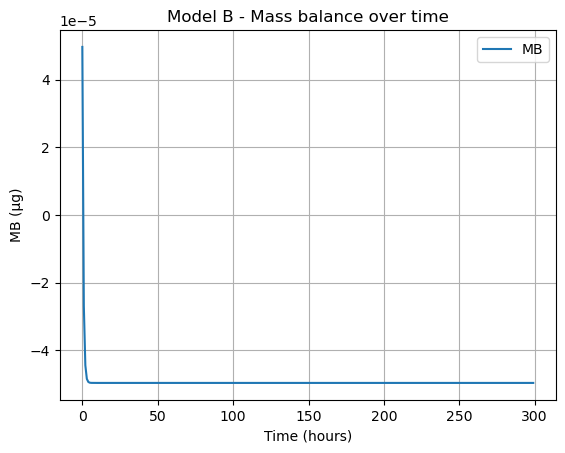

In [40]:
# plot MB
plt.plot(MB_check, label='MB')
plt.xlabel('Time (hours)')
plt.ylabel('MB (µg)')
plt.title('Model B - Mass balance over time')
plt.legend()
plt.grid(True)
plt.show()

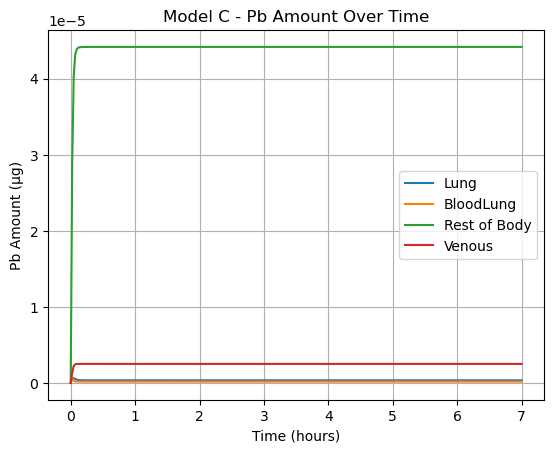

In [28]:
# Plot the amount
plt.plot(simulation[:, 0], simulation[:, 5], label='Lung')
plt.plot(simulation[:, 0], simulation[:, 6], label='BloodLung')
plt.plot(simulation[:, 0], simulation[:, 4], label='Rest of Body')
plt.plot(simulation[:, 0], simulation[:, 3], label='Venous')
plt.xlabel('Time (hours)')
plt.ylabel('Pb Amount (µg)')
plt.title('Model C - Pb Amount Over Time')
plt.legend()
plt.grid(True)
plt.show()

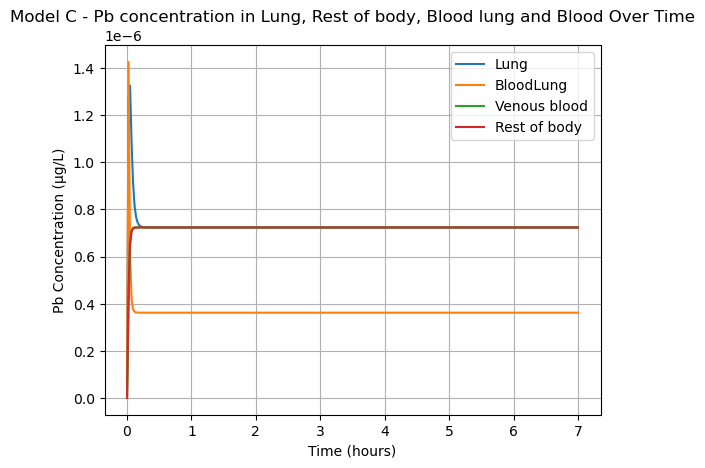

In [36]:
# Plot the concentration
plt.plot(simulation[:, 0], simulation[:, 5]/r.Vlung, label='Lung')
plt.plot(simulation[:, 0], simulation[:, 6]/r.Vbloodlung, label='BloodLung')
plt.plot(simulation[:, 0], simulation[:, 3]/r.Vven, label='Venous blood')
plt.plot(simulation[:, 0], simulation[:, 4]/r.Vrest, label='Rest of body')
plt.xlabel('Time (hours)')
plt.ylabel('Pb Concentration (µg/L)')
plt.title('Model C - Pb concentration in Lung, Rest of body, Blood lung and Blood Over Time')
plt.legend()
plt.grid(True)
plt.show()